# Table of Contents

1. [Introduction](#Introduction)
2. [Required Modules](#Required-Modules)
3. [Data Preprocessing](#Data-Preprocessing)
  - [Key Features](#Key-Features)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Missing Values](#Missing-Values)
  - [Data Transformation](#Data-Transformation)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Visualization](#Visualization)
  - [Correlation](#Correlation)
5. [Model Building](#Model-Building)
  - [Linear Regression](#Linear-Regression)
  - [Polynomial Regression](#Polynomial-Regression)
  - [Decision Tree Regressor](#Decision-Tree-Regressor)
  - [Random Forest Regressor](#Random-Forest-Regressor)

6. [Evaluation](#Evaluation)
7. [Conclusion](#Conclusion)

## 1. Introduction <a name="Introduction"></a>

This project aims to develop a predictive model for estimating medical expenses based on patients' information. Accurate predictions of medical expenses can provide valuable insights for individuals, insurance companies, and healthcare providers to better understand and plan for healthcare costs. By utilizing the publicly available Insurance dataset from Kaggle, which includes a range of variables related to patients' characteristics and medical expenses, we can explore the relationships between these factors and develop a robust model for predicting medical costs. The insights gained from this project have the potential to inform decision-making processes and contribute to more effective healthcare planning and financial management.


In the following sections, we will delve into the dataset, perform preprocessing tasks, conduct exploratory data analysis, build and evaluate predictive models, and conclude with a summary of our findings and potential future directions.









## 2. Required Modules <a name="Required-Modules"></a>



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 3. Data Preprocessing <a name="Data-Preprocessing"></a>
In this section, we discuss the steps taken to preprocess the dataset. Through preprocessing steps, including data cleaning, handling missing values, and converting categorical variables into numerical formats, we will ensure the dataset is ready for analysis.


### 3.1 Key Features <a name="Key-Features"></a>
The dataset contains the following information:


| Variable | Description |
| --- | --- |
| age | age of primary beneficiary |
|bmi | body mass index |
|children | number of children covered by health insurance |
|smoker | smoking |
|region | the beneficiary's residential area in the US |
|charges | individual medical costs billed by health insurance |


In [17]:
# Load the data
data = pd.read_csv('insurance.csv')
data.head(-1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


### 3.2 Descriptive Statistics <a name="Descriptive-Statistics"></a>

Now we generate the summary statistics:

- Count: The number of non-missing values in each column.
- Mean: The average value of each column.
- Standard Deviation: A measure of the amount of variation or dispersion in each column.
- Minimum: The minimum value in each column.
- 25th Percentile (Q1): The value below which 25% of the data falls.
- Median (50th Percentile or Q2): The middle value in each column. It represents the value below which 50% of the data falls.
- 75th Percentile (Q3): The value below which 75% of the data falls.
- Maximum: The maximum value in each column.


In [18]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3.3 Missing Values <a name="Missing-Values"></a>



In [20]:
# Check for missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
#checking the data types of the columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 3.4 Data Transformation <a name="Data-Transformation"></a>



In [22]:
#value counts for categorical variables
print(data.sex.value_counts(),'\n\n',data.smoker.value_counts(),'\n\n',data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 

 no     1064
yes     274
Name: smoker, dtype: int64 

 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [23]:
#Replacing the categorical variables with numerical values.
# sex : 1-male, 0-female
# smoker : 1-yes, 0-no
# region : 0-northeast, 1-northwest, 2-southeast, 3-southwest

data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [24]:
data.head(-1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,0,11411.68500
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350


## 4. Exploratory Data Analysis <a name="Exploratory-Data-Analysis"></a>

Exploratory data analysis will allow us to gain insights into the distribution of features, detect correlations, and uncover potential patterns and trends related to medical cost data.

### 4.1 Visualization <a name="Visualization"></a>

Text(0.5, 1.0, 'Charges Distribution')

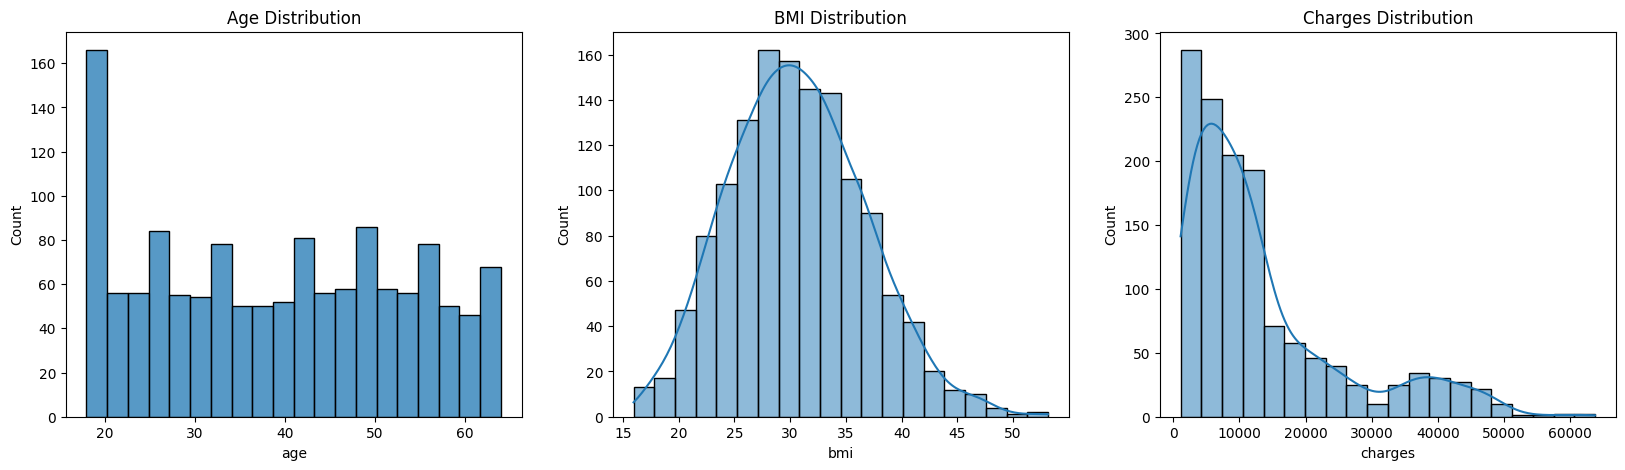

In [51]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))

sns.histplot(x = "age", data=data, ax = ax[0], kde=False,bins=20).set_title('Age Distribution')
sns.histplot(x = "bmi", data=data, ax = ax[1], kde=True,bins=20).set_title('BMI Distribution')
sns.histplot(x = "charges", data=data, ax = ax[2], kde=True,bins=20).set_title('Charges Distribution')

<ipython-input-52-45dcdb8e9cfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex', data = data, ax = ax[0],palette='dark').set_title('Gender Distribution')
<ipython-input-52-45dcdb8e9cfc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'children', data = data, ax = ax[1],palette='dark').set_title('Children Distribution')
<ipython-input-52-45dcdb8e9cfc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'region', data = data, ax = ax[2],palette='dark').set_title('Region Distribution')
<ipython-input-52-45dcdb8e9cfc>:6: F

Text(0.5, 1.0, 'Smoker Distribution')

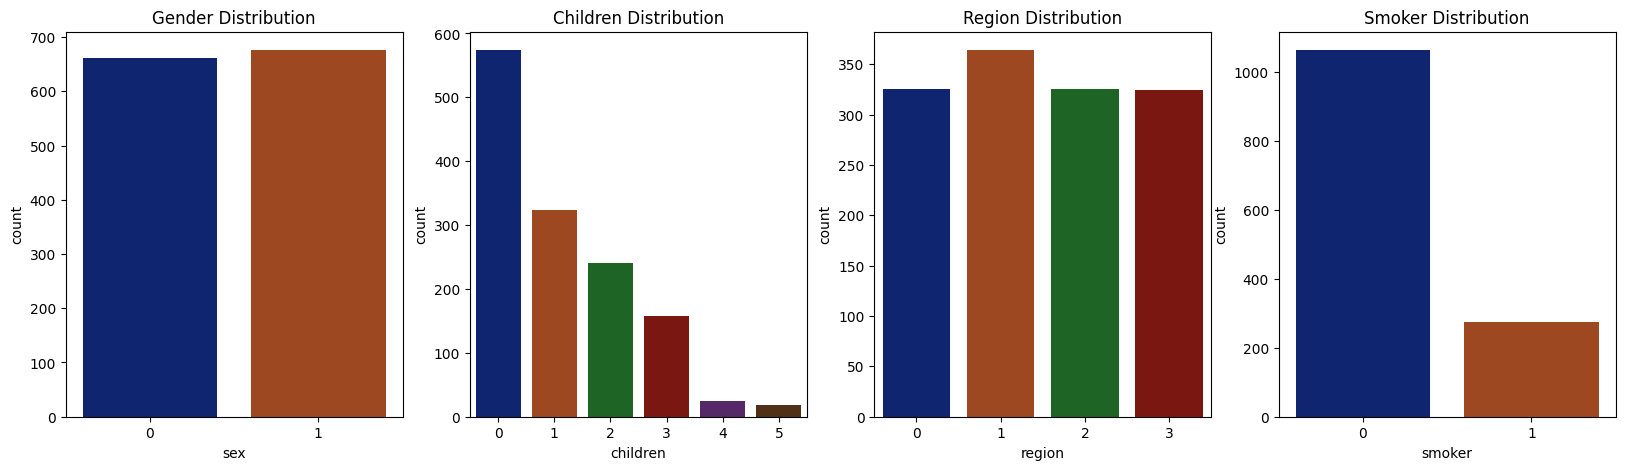

In [52]:
fig, ax = plt.subplots(1,4,figsize=(20, 5))

sns.countplot(x = 'sex', data = data, ax = ax[0],palette='dark').set_title('Gender Distribution')
sns.countplot(x = 'children', data = data, ax = ax[1],palette='dark').set_title('Children Distribution')
sns.countplot(x = 'region', data = data, ax = ax[2],palette='dark').set_title('Region Distribution')
sns.countplot(x = 'smoker', data = data, ax = ax[3],palette='dark').set_title('Smoker Distribution')

<Axes: xlabel='smoker', ylabel='count'>

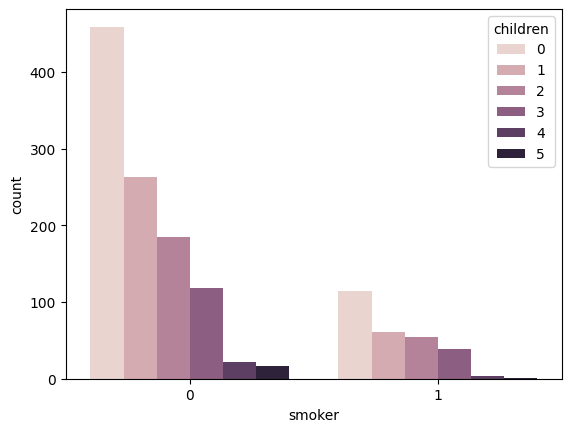

In [53]:
sns.countplot(x = data.smoker, hue = data.children)

### 4.2 Correlation <a name="Correlation"></a>

In [54]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<Axes: >

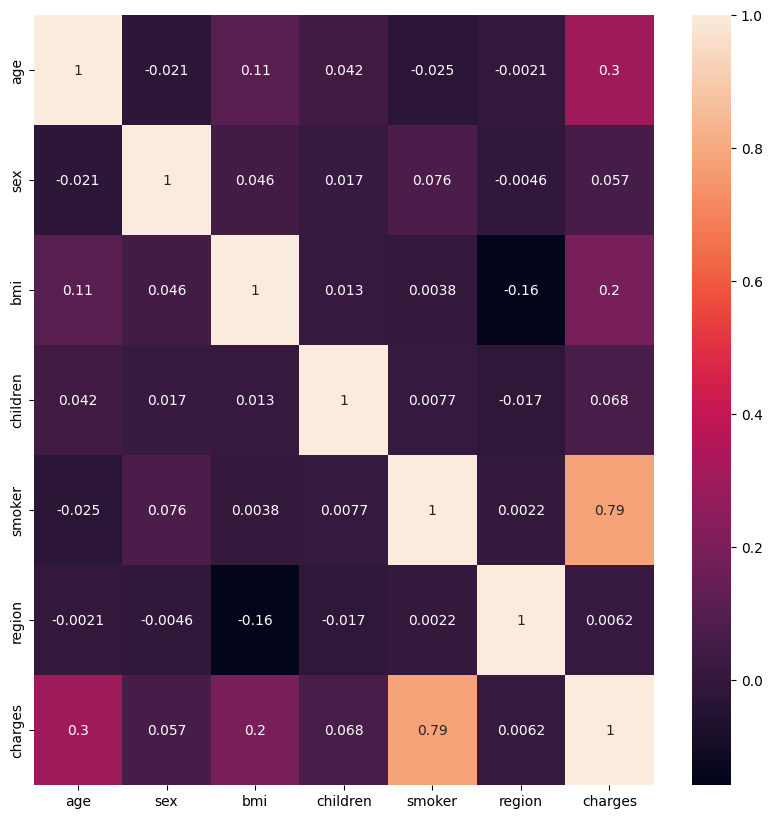

In [55]:
# create a heatmap to check the correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

The variable "smoker" exhibits a notable correlation with medical expenses. Consequently, further investigation will be conducted to delve into the smoking habits of patients and their relationships with other factors.

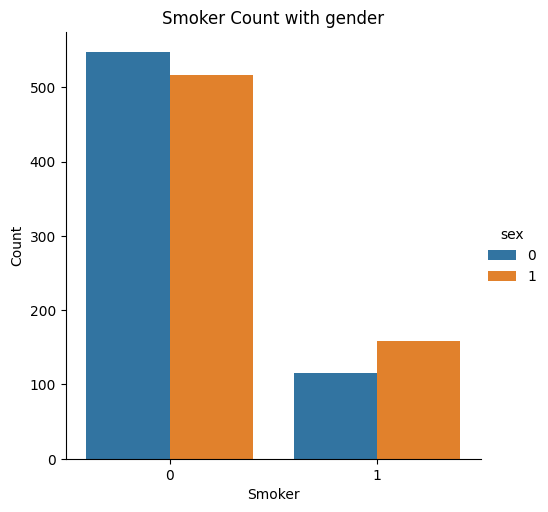

In [56]:
#Plotting the smoker count with patient's gender
sns.catplot(x="smoker", kind="count",hue = 'sex', data=data)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

<ipython-input-58-72906c32eec5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'sex', y = 'charges', data = data, palette='dark')


<Axes: xlabel='sex', ylabel='charges'>

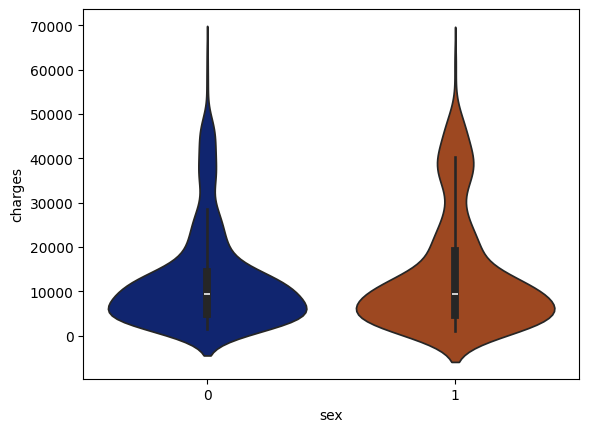

In [58]:
sns.violinplot(x = 'sex', y = 'charges', data = data, palette='dark')

<ipython-input-60-e6f17c686983>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h",palette='dark')


<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

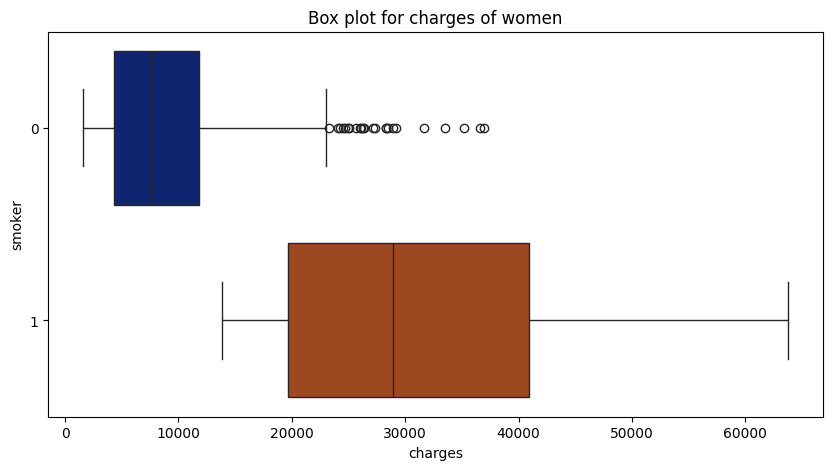

In [60]:
plt.figure(figsize=(10,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h",palette='dark')

<ipython-input-61-f908a30defa1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h",palette='dark')


<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

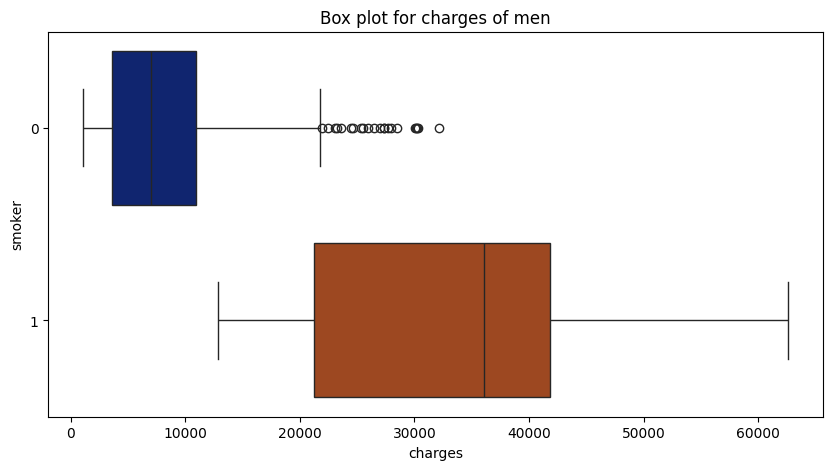

In [61]:
plt.figure(figsize=(10,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h",palette='dark')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


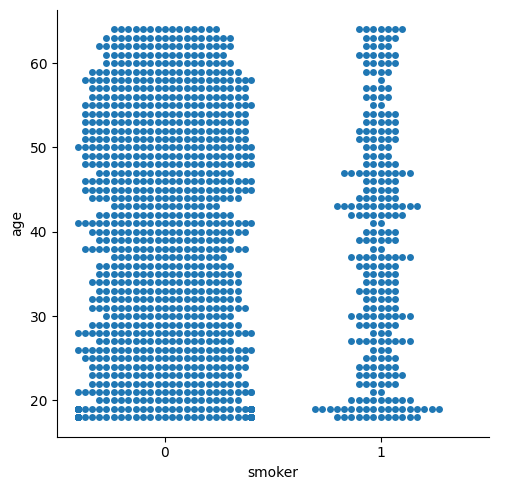

In [64]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=data)

<ipython-input-66-784ecf8d72bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data =  data[(data.age == 19)] , orient="h",palette='dark')


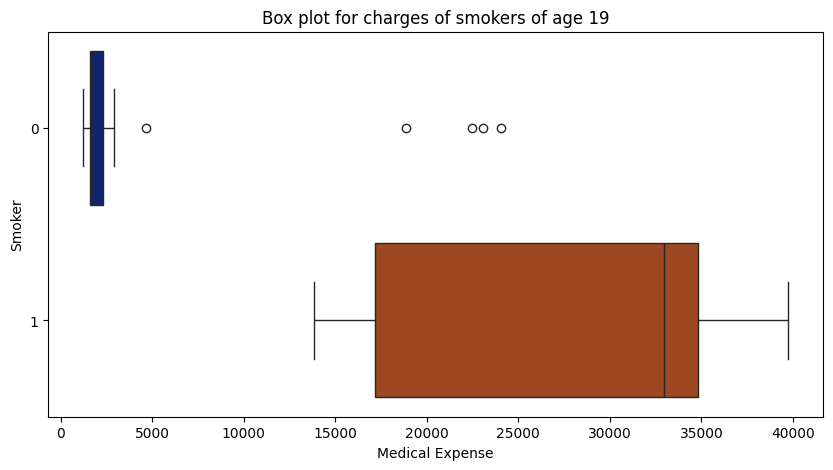

In [66]:
#smokers of age 19
plt.figure(figsize=(10,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  data[(data.age == 19)] , orient="h",palette='dark')
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

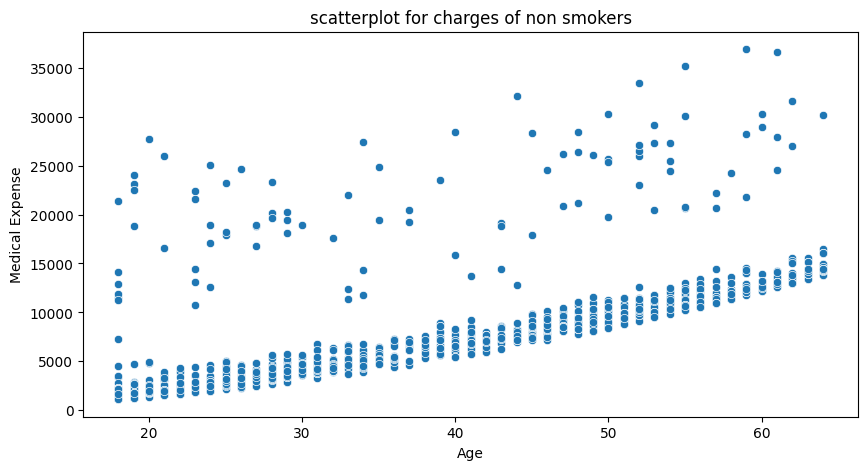

In [67]:
#non smokers charge distribution
plt.figure(figsize=(10,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  data[(data.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

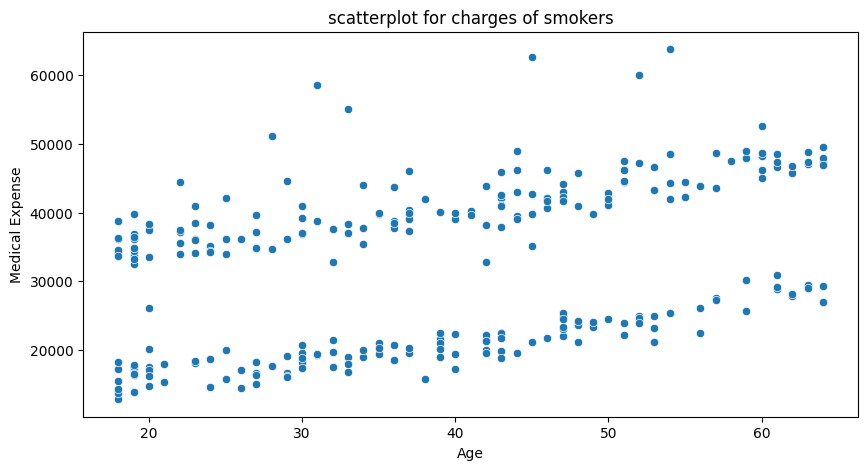

In [68]:
#smokers charge distribution
plt.figure(figsize=(10,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data =  data[(data.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

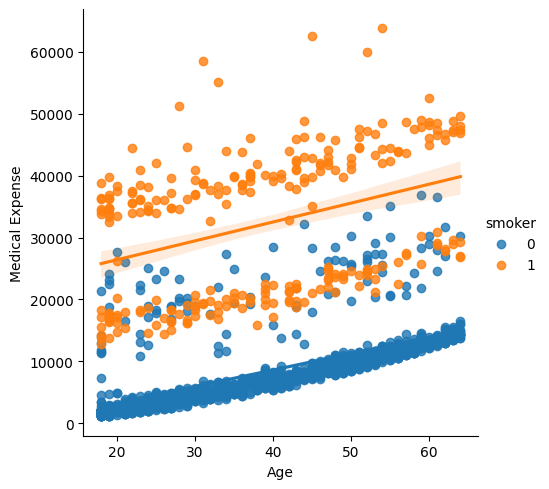

In [69]:
#age charges distribution
sns.lmplot(x="age", y="charges", data =  data, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

<ipython-input-70-45a31693e046>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi >= 30)]['charges'])


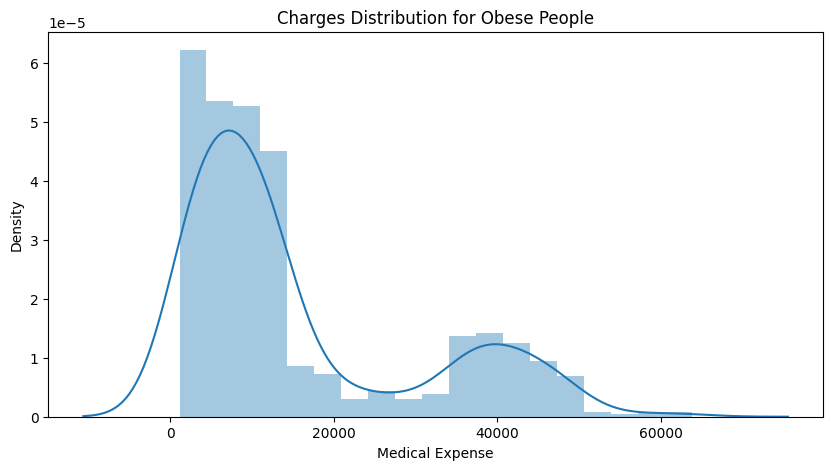

In [70]:
#bmi charges for obese people
plt.figure(figsize=(10,5))
sns.distplot(data[(data.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

<ipython-input-71-1ef2f718391c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi < 30)]['charges'])


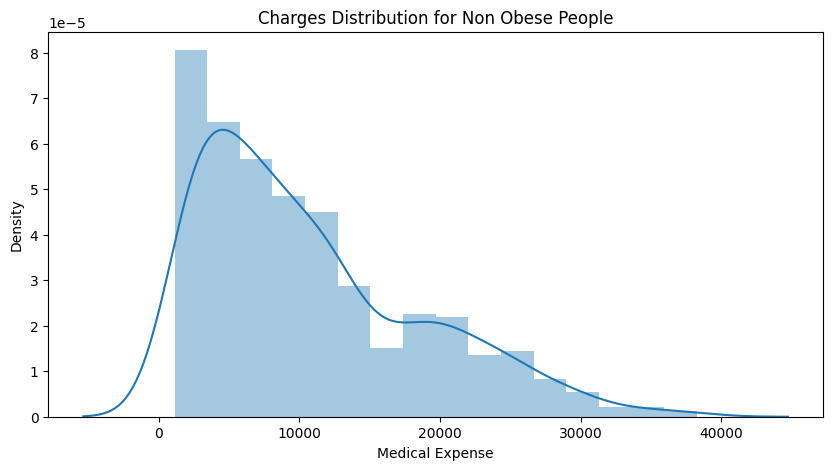

In [71]:
#bmi charges for healthy people
plt.figure(figsize=(10,5))
sns.distplot(data[(data.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

## 5. Model Building <a name="Model-Building"></a>
In thise section we build predictive models using machine learning algorithms.
First we have to split the dataset for training and testing.


In [80]:
x = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape,y_train.shape)

(936, 6) (936,)


### 5.1 Linear Regression <a name="Linear-Regression"></a>

In [81]:
lr = LinearRegression()

#model training
lr.fit(X_train,y_train)

#model accuracy
lr.score(X_train,y_train)

0.7306840408360217

In [82]:
#model prediction
lr_pred = lr.predict(X_test)

### 5.2 Polynomial Regression <a name="Polynomial-Regression"></a>

In [83]:
poly_reg = PolynomialFeatures(degree=2)

#transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(X_train)

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.3, random_state=0)

plr = LinearRegression()

#model training
plr.fit(x_train,y_train)

#model accuracy
plr.score(x_train,y_train)

0.823508486229389

In [85]:
#model prediction
plr_pred = plr.predict(x_test)

### 5.3 Decision Tree Regressor <a name="Decision-Tree-Regressor"></a>

In [87]:
dtree = DecisionTreeRegressor()

#model training
dtree.fit(x_train,y_train)

#model accuracy
dtree.score(x_train,y_train)

1.0

In [88]:
#model prediction
dtree_pred = dtree.predict(x_test)

### 5.4 Random Forest Regressor <a name="Random-Forest-Regressor"></a>


In [89]:
rf = RandomForestRegressor(n_estimators=100)

#model training
rf.fit(x_train,y_train)

#model accuracy
rf.score(x_train,y_train)

0.9760757653329029

In [90]:
#model prediction
rf_pred = rf.predict(x_test)

## 6. Evaluation <a name="Evaluation"></a>
In this secton we evaluate the performance of the models and compare them.

<ipython-input-91-68e88b8667d8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-91-68e88b8667d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_pred,hist=False,color='b',label='Predicted Value',ax=ax1)

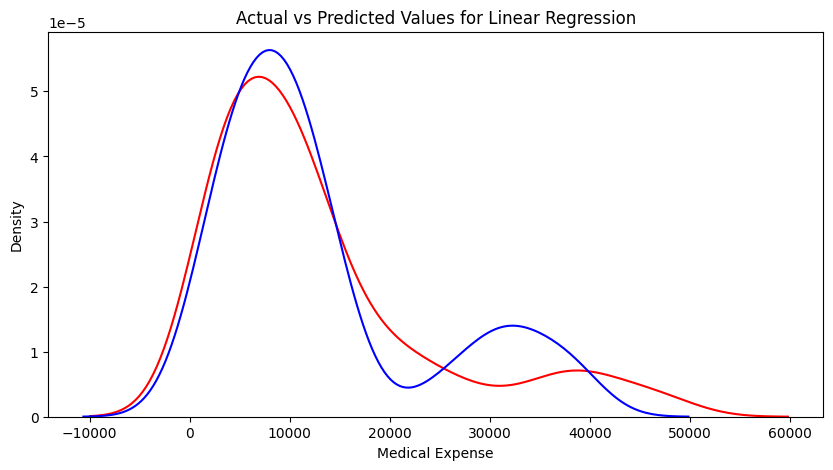

In [91]:
#distribution of actual and predicted values
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(lr_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [96]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 3171.577147651246
MSE: 24768734.071811773
RMSE: 4976.819674431833
R2 Score: 0.810056604153765


<ipython-input-97-def7476710b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-97-def7476710b7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plr_pred,hist=False,color='b',label='Predicted Value',ax=ax1

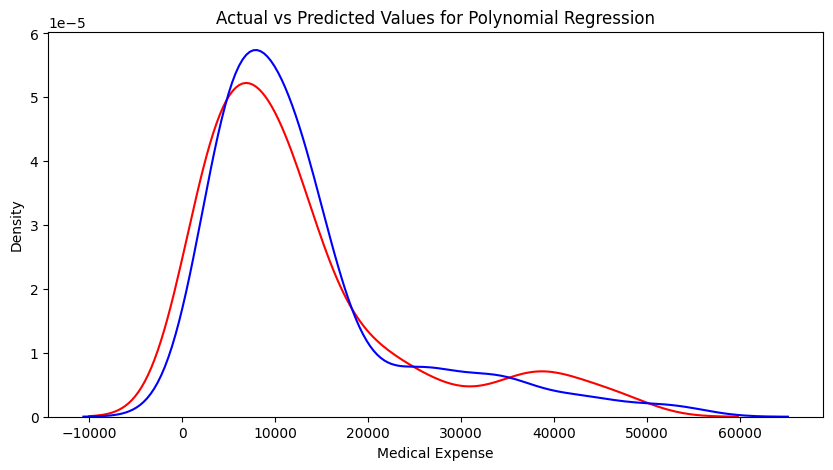

In [97]:
#acutal vs predicted values for polynomial regression
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(plr_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

In [100]:
print('MAE:', mean_absolute_error(y_test, plr_pred))
print('MSE:', mean_squared_error(y_test, plr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, plr_pred)))
print('R2 Score:', r2_score(y_test, plr_pred))

MAE: 3171.577147651246
MSE: 24768734.071811773
RMSE: 4976.819674431833
R2 Score: 0.810056604153765


<ipython-input-101-46f60f40ec0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-101-46f60f40ec0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values"

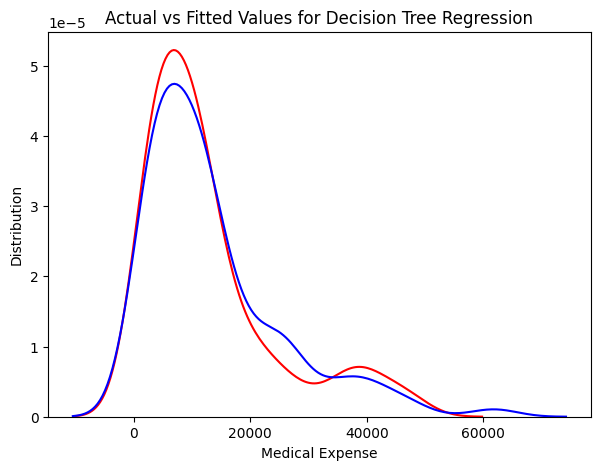

In [101]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [102]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))

MAE: 3503.842228718861
MSE: 51386422.76731859
RMSE: 7168.432378652852
Accuracy: 0.6059341744105204


<ipython-input-103-255136d82566>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-103-255136d82566>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , 

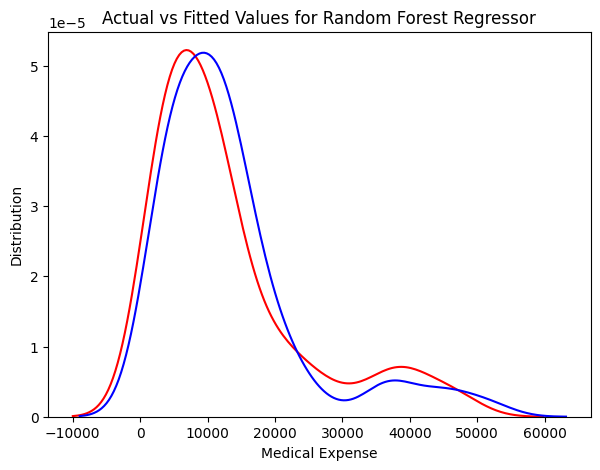

In [103]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [104]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2857.716547813523
MSE: 26745377.817656755
RMSE: 5171.59335385689
Accuracy: 0.7948983637537721


## 7. Conclusion <a name="Conclusion"></a>

Based on the aforementioned models, it is evident that both the Decision Tree Regressor and Random Forest Regressor yield favorable outcomes. However, the Random Forest Regressor outperforms the others, as it demonstrates the lowest Root Mean Square Error (RMSE) value. Consequently, the Random Forest Regressor will be employed to forecast the medical expenses of patients.

Furthermore, it is observed that smokers tend to have higher medical expenses compared to non-smokers. Similarly, patients with a body mass index (BMI) exceeding 30 exhibit higher medical expenses than those with a BMI below 30. Additionally, older patients tend to incur higher medical expenses than younger patients.

In conclusion, the comprehensive analysis indicates that the medical expenses of patients are influenced by their age, BMI, and smoking habits.